In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import xgboost as xgb 
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
color_pal = sns.color_palette()
import pandas as pd
import numpy as np
import os
import csv
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from itertools import combinations

In [4]:
df_cabbage = pd.read_csv(r'C:\Users\user\OneDrive\桌面\GitHub\Big-Data-project\cabbage and weather data\new_2000_2023cabbage.csv')
df_cabbage['datetime'] = pd.to_datetime(df_cabbage[['year', 'month', 'day']])
# df_cabbage = df_cabbage.set_index('datetime')
df_cabbage.head(3)

,dayoffset,TransDate,Crop,MarketName,Upper_Price,Middle_Price,Lower_Price,Avg_Price,Trans_Quantity,year,month,day,datetime
0,2,089/01/02,LA1 甘藍 初秋,109 台北一,11.0,8.0,5.0,8.9,"192,029",2000,1,2,2000-01-02
1,3,089/01/03,LA1 甘藍 初秋,109 台北一,9.0,7.0,4.0,7.2,"174,270",2000,1,3,2000-01-03
2,4,089/01/04,LA1 甘藍 初秋,109 台北一,8.0,6.0,3.0,6.7,"125,426",2000,1,4,2000-01-04


In [5]:
df_chi = pd.read_csv(r"C:\Users\user\OneDrive\桌面\GitHub\Big-Data-project\cabbage and weather data\ALL_chiayi_merged_data.csv")
df_nan = pd.read_csv(r"C:\Users\user\OneDrive\桌面\GitHub\Big-Data-project\cabbage and weather data\ALL_nantou_merged_data.csv")
df_tai = pd.read_csv(r"C:\Users\user\OneDrive\桌面\GitHub\Big-Data-project\cabbage and weather data\ALL_taichung_merged_data.csv")
df_yil = pd.read_csv(r"C:\Users\user\OneDrive\桌面\GitHub\Big-Data-project\cabbage and weather data\ALL_yilan_merged_data.csv")

df_chi.head(5)

,dayoffset,觀測時間(day),測站氣壓(hPa),海平面氣壓(hPa),測站最高氣壓(hPa),測站最高氣壓時間(LST),測站最低氣壓(hPa),測站最低氣壓時間(LST),氣溫(℃),最高氣溫(℃),...,日最高紫外線指數,日最高紫外線指數時間(LST),總雲量(0~10),地溫0cm,地溫5cm,地溫10cm,地溫20cm,地溫30cm,地溫50cm,地溫100cm
0,1,1,1013.0,1016.3,1015.5,2000-01-01 08:31:00,1010.1,2000/01/01 15:44:00,18.9,26.0,...,4,2000/01/01 13:00:00,1.8,20.2,19.8,19.9,20.4,20.0,20.3,21.5
1,2,2,1012.6,1015.9,1014.3,2000-01-02 08:59:00,1010.0,2000/01/02 15:44:00,17.5,25.7,...,4,2000/01/02 12:00:00,0.0,18.4,18.7,19.4,20.0,19.9,20.4,21.6
2,3,3,1013.5,1016.8,1014.8,2000-01-03 09:08:00,1012.2,2000/01/03 14:30:00,17.6,24.5,...,3,2000/01/03 13:00:00,1.8,18.5,19.0,19.5,20.0,19.8,20.2,21.5
3,4,4,1013.5,1016.8,1015.5,2000-01-04 09:16:00,1011.5,2000/01/04 14:46:00,17.0,23.5,...,3,2000/01/04 13:00:00,5.5,18.5,19.0,19.2,19.8,19.8,20.2,21.7
4,5,5,1011.3,1014.6,1013.6,2000-01-05 00:44:00,1009.0,2000/01/05 16:25:00,19.2,27.5,...,4,2000/01/05 13:00:00,2.6,19.9,19.7,19.6,20.0,19.9,20.4,21.5


In [6]:
df_chi['datetime'] = pd.to_datetime(df_chi['測站最高氣壓時間(LST)']).dt.date
# df_chi = df_chi.set_index('datetime')

df_nan['datetime'] = pd.to_datetime(df_nan['測站最高氣壓時間(LST)']).dt.date
# df_nan = df_nan.set_index('datetime')

df_tai['datetime'] = pd.to_datetime(df_tai['測站最高氣壓時間(LST)']).dt.date
# df_tai = df_tai.set_index('datetime')

df_yil['datetime'] = pd.to_datetime(df_yil['測站最高氣壓時間(LST)']).dt.date
# df_yil = df_yil.set_index('datetime')

df_chi.head(5)

,dayoffset,觀測時間(day),測站氣壓(hPa),海平面氣壓(hPa),測站最高氣壓(hPa),測站最高氣壓時間(LST),測站最低氣壓(hPa),測站最低氣壓時間(LST),氣溫(℃),最高氣溫(℃),...,日最高紫外線指數時間(LST),總雲量(0~10),地溫0cm,地溫5cm,地溫10cm,地溫20cm,地溫30cm,地溫50cm,地溫100cm,datetime
0,1,1,1013.0,1016.3,1015.5,2000-01-01 08:31:00,1010.1,2000/01/01 15:44:00,18.9,26.0,...,2000/01/01 13:00:00,1.8,20.2,19.8,19.9,20.4,20.0,20.3,21.5,2000-01-01
1,2,2,1012.6,1015.9,1014.3,2000-01-02 08:59:00,1010.0,2000/01/02 15:44:00,17.5,25.7,...,2000/01/02 12:00:00,0.0,18.4,18.7,19.4,20.0,19.9,20.4,21.6,2000-01-02
2,3,3,1013.5,1016.8,1014.8,2000-01-03 09:08:00,1012.2,2000/01/03 14:30:00,17.6,24.5,...,2000/01/03 13:00:00,1.8,18.5,19.0,19.5,20.0,19.8,20.2,21.5,2000-01-03
3,4,4,1013.5,1016.8,1015.5,2000-01-04 09:16:00,1011.5,2000/01/04 14:46:00,17.0,23.5,...,2000/01/04 13:00:00,5.5,18.5,19.0,19.2,19.8,19.8,20.2,21.7,2000-01-04
4,5,5,1011.3,1014.6,1013.6,2000-01-05 00:44:00,1009.0,2000/01/05 16:25:00,19.2,27.5,...,2000/01/05 13:00:00,2.6,19.9,19.7,19.6,20.0,19.9,20.4,21.5,2000-01-05


傳換 object to float 因為每個天氣站的 數值資料都不一樣

In [7]:
def change_to_float(df):
    df['降水量(mm)'] = pd.to_numeric(df['降水量(mm)'], errors='coerce')
    df['最大十分鐘降水量(mm)'] = pd.to_numeric(df['最大十分鐘降水量(mm)'], errors='coerce')
    df['最大六十分鐘降水量(mm)'] = pd.to_numeric(df['最大六十分鐘降水量(mm)'], errors='coerce')
    df['A型蒸發量(mm)'] = pd.to_numeric(df['A型蒸發量(mm)'], errors='coerce')
    df['地溫0cm'] = pd.to_numeric(df['地溫0cm'], errors='coerce')
    df['地溫5cm'] = pd.to_numeric(df['地溫5cm'], errors='coerce')
    df['地溫10cm'] = pd.to_numeric(df['地溫10cm'], errors='coerce')
    df['地溫20cm'] = pd.to_numeric(df['地溫20cm'], errors='coerce')
    df['地溫30cm'] = pd.to_numeric(df['地溫30cm'], errors='coerce')
    df['地溫50cm'] = pd.to_numeric(df['地溫50cm'], errors='coerce')
    df['地溫100cm'] = pd.to_numeric(df['地溫100cm'], errors='coerce')
    return df

df_chi = change_to_float(df_chi)
df_nan = change_to_float(df_nan)
df_tai = change_to_float(df_tai)
df_yil = change_to_float(df_yil)

In [8]:
def print_object(df):
    string_columns = []
    for col in df:
            if(df[col].dtypes=='object'):
                string_columns.append(col)
    print(string_columns)

def delete_object(df):
    string_columns = []
    for col in df:
            if(col =='datetime'): continue
            if(df[col].dtypes=='object'):
                string_columns.append(col)
    df.drop(labels=string_columns,axis='columns',inplace=True)
    return df

In [9]:
df_chi = delete_object(df_chi)
df_nan = delete_object(df_nan)
df_tai = delete_object(df_tai)
df_yil = delete_object(df_yil)

轉換交易量

In [10]:
df_cabbage['Trans_Quantity'] = df_cabbage['Trans_Quantity'].str.replace(',', '').astype(int)

In [11]:
df_cabbage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7250 entries, 0 to 7249
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   dayoffset       7250 non-null   int64         
 1   TransDate       7250 non-null   object        
 2   Crop            7250 non-null   object        
 3   MarketName      7250 non-null   object        
 4   Upper_Price     7250 non-null   float64       
 5   Middle_Price    7250 non-null   float64       
 6   Lower_Price     7250 non-null   float64       
 7   Avg_Price       7250 non-null   float64       
 8   Trans_Quantity  7250 non-null   int32         
 9   year            7250 non-null   int64         
 10  month           7250 non-null   int64         
 11  day             7250 non-null   int64         
 12  datetime        7250 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int32(1), int64(4), object(3)
memory usage: 708.1+ KB


In [12]:
a = set (df_chi.columns)
b = set(df_nan.columns)
c = set(df_tai.columns)
d = set(df_yil.columns)

mutual_columns = b.intersection(a, c, d)
non_mutual_columns1 = a.union(b ,c, d) - mutual_columns
non_mutual_columns2 = b.union(a ,c, d) - mutual_columns
non_mutual_columns3 = c.union(b ,a, d) - mutual_columns
non_mutual_columns4 = d.union(b ,a, c) - mutual_columns

In [13]:
print(mutual_columns)
print(non_mutual_columns1)
print(non_mutual_columns2)
print(non_mutual_columns3)
print(non_mutual_columns4)

{'降水量(mm)', '露點溫度(℃)', '觀測時間(day)', '最小相對溼度(%)', '日照時數(hour)', '測站氣壓(hPa)', '最大十分鐘降水量(mm)', '地溫10cm', 'dayoffset', '風速(m/s)', 'datetime', '氣溫(℃)', '海平面氣壓(hPa)', 'A型蒸發量(mm)', '能見度(km)', '最高氣溫(℃)', '地溫50cm', '最大六十分鐘降水量(mm)', '地溫100cm', '地溫0cm', '地溫5cm', '降水時數(hour)', '相對溼度(%)', '最低氣溫(℃)', '測站最低氣壓(hPa)', '地溫30cm', '地溫20cm', '測站最高氣壓(hPa)'}
{'總雲量(0~10)', '風向(360degree)', '日最高紫外線指數', '重力位高度(gpm)', '最大瞬間風(m/s)', '日照率(%)', '最大瞬間風風向(360degree)', '全天空日射量(MJ/㎡)'}
{'總雲量(0~10)', '風向(360degree)', '日最高紫外線指數', '重力位高度(gpm)', '最大瞬間風(m/s)', '日照率(%)', '最大瞬間風風向(360degree)', '全天空日射量(MJ/㎡)'}
{'總雲量(0~10)', '風向(360degree)', '日最高紫外線指數', '重力位高度(gpm)', '最大瞬間風(m/s)', '日照率(%)', '最大瞬間風風向(360degree)', '全天空日射量(MJ/㎡)'}
{'總雲量(0~10)', '風向(360degree)', '日最高紫外線指數', '重力位高度(gpm)', '最大瞬間風(m/s)', '日照率(%)', '最大瞬間風風向(360degree)', '全天空日射量(MJ/㎡)'}


In [14]:
df_chi = df_chi[list(mutual_columns)]
df_nan = df_nan[list(mutual_columns)]
df_tai = df_tai[list(mutual_columns)]
df_yil = df_yil[list(mutual_columns)]

In [15]:
df_chi.columns

Index(['降水量(mm)', '露點溫度(℃)', '觀測時間(day)', '最小相對溼度(%)', '日照時數(hour)',
       '測站氣壓(hPa)', '最大十分鐘降水量(mm)', '地溫10cm', 'dayoffset', '風速(m/s)',
       'datetime', '氣溫(℃)', '海平面氣壓(hPa)', 'A型蒸發量(mm)', '能見度(km)', '最高氣溫(℃)',
       '地溫50cm', '最大六十分鐘降水量(mm)', '地溫100cm', '地溫0cm', '地溫5cm', '降水時數(hour)',
       '相對溼度(%)', '最低氣溫(℃)', '測站最低氣壓(hPa)', '地溫30cm', '地溫20cm', '測站最高氣壓(hPa)'],
      dtype='object')

In [16]:
df_cabbage['days_rain_gt_200'] = 0

# 計算60天滑動降雨量大於200的天數
for i in range(61,len(df_cabbage['dayoffset'])):

    relevant_weather_data = df_chi[(df_chi['dayoffset'] >= i-60) & (df_chi['dayoffset'] < i)]
    df_cabbage.at[i, 'chi_days_rain_gt_80'] = len(relevant_weather_data[relevant_weather_data['降水量(mm)'] > 80])
    df_cabbage.at[i, 'chi_days_rain_gt_200'] = len(relevant_weather_data[relevant_weather_data['降水量(mm)'] > 200])
    df_cabbage.at[i, 'chi_days_rain_gt_350'] = len(relevant_weather_data[relevant_weather_data['降水量(mm)'] > 350])
    
    relevant_weather_data = df_nan[(df_nan['dayoffset'] >= i-60) & (df_nan['dayoffset'] < i)]
    df_cabbage.at[i, 'nan_days_rain_gt_80'] = len(relevant_weather_data[relevant_weather_data['降水量(mm)'] > 80])
    df_cabbage.at[i, 'nan_days_rain_gt_200'] = len(relevant_weather_data[relevant_weather_data['降水量(mm)'] > 200])
    df_cabbage.at[i, 'nan_days_rain_gt_350'] = len(relevant_weather_data[relevant_weather_data['降水量(mm)'] > 350])

    relevant_weather_data = df_tai[(df_tai['dayoffset'] >= i-60) & (df_tai['dayoffset'] < i)]
    df_cabbage.at[i, 'tai_days_rain_gt_80'] = len(relevant_weather_data[relevant_weather_data['降水量(mm)'] > 80])
    df_cabbage.at[i, 'tai_days_rain_gt_200'] = len(relevant_weather_data[relevant_weather_data['降水量(mm)'] > 200])
    df_cabbage.at[i, 'tai_days_rain_gt_350'] = len(relevant_weather_data[relevant_weather_data['降水量(mm)'] > 350])

    relevant_weather_data = df_yil[(df_chi['dayoffset'] >= i-60) & (df_yil['dayoffset'] < i)]
    df_cabbage.at[i, 'yil_days_rain_gt_80'] = len(relevant_weather_data[relevant_weather_data['降水量(mm)'] > 80])
    df_cabbage.at[i, 'yil_days_rain_gt_200'] = len(relevant_weather_data[relevant_weather_data['降水量(mm)'] > 200])
    df_cabbage.at[i, 'yil_days_rain_gt_350'] = len(relevant_weather_data[relevant_weather_data['降水量(mm)'] > 350])




In [17]:
pre_features=["Trans_Quantity_day1","Trans_Quantity_day2","Trans_Quantity_day3","Trans_Quantity_day4","Trans_Quantity_day5","Avg_Price_day1","Avg_Price_day2","Avg_Price_day3","Avg_Price_day4","Avg_Price_day5"]


for day in range(0,8766):##2558 733
    target_row =  df_cabbage[df_cabbage['dayoffset'] == day]
    index=target_row.index
    if target_row.empty:
        continue
    # 初始化每個檔案的溫度總和和有效數據個數
    selected_data = []
    for i in range(day-5, day):
        test_row = df_cabbage[df_cabbage['dayoffset'] == i]
        if test_row.empty:
             for tempnum in range(day-5, day): 
                find_row = df_cabbage[df_cabbage['dayoffset'] == tempnum]
                if find_row.empty:
                    if tempnum==day-1:
                        selected_data.append(0)
                    continue
                else:
                    selected_data.append(find_row['Trans_Quantity'])
                    break
        else:
            selected_data.append(test_row['Trans_Quantity'])
    for i in range(day-5, day):
        test_row = df_cabbage[df_cabbage['dayoffset'] == i]
        if test_row.empty:
           for tempnum in range(day-5, day): 
                find_row = df_cabbage[df_cabbage['dayoffset'] == tempnum]
                if find_row.empty:
                    if tempnum==day-1:
                        selected_data.append(0)
                    continue
                else:
                    selected_data.append(find_row['Avg_Price'])
                    break
        else:
            selected_data.append(test_row['Avg_Price'])
    
    # 將 list 轉換為 Series
    selected_data = pd.Series(selected_data)
    df_cabbage.loc[df_cabbage['dayoffset'] == day, pre_features] = selected_data.values

In [18]:
df_chi.columns

Index(['降水量(mm)', '露點溫度(℃)', '觀測時間(day)', '最小相對溼度(%)', '日照時數(hour)',
       '測站氣壓(hPa)', '最大十分鐘降水量(mm)', '地溫10cm', 'dayoffset', '風速(m/s)',
       'datetime', '氣溫(℃)', '海平面氣壓(hPa)', 'A型蒸發量(mm)', '能見度(km)', '最高氣溫(℃)',
       '地溫50cm', '最大六十分鐘降水量(mm)', '地溫100cm', '地溫0cm', '地溫5cm', '降水時數(hour)',
       '相對溼度(%)', '最低氣溫(℃)', '測站最低氣壓(hPa)', '地溫30cm', '地溫20cm', '測站最高氣壓(hPa)'],
      dtype='object')

In [19]:
df_cabbage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7250 entries, 0 to 7249
Data columns (total 36 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   dayoffset             7250 non-null   int64         
 1   TransDate             7250 non-null   object        
 2   Crop                  7250 non-null   object        
 3   MarketName            7250 non-null   object        
 4   Upper_Price           7250 non-null   float64       
 5   Middle_Price          7250 non-null   float64       
 6   Lower_Price           7250 non-null   float64       
 7   Avg_Price             7250 non-null   float64       
 8   Trans_Quantity        7250 non-null   int32         
 9   year                  7250 non-null   int64         
 10  month                 7250 non-null   int64         
 11  day                   7250 non-null   int64         
 12  datetime              7250 non-null   datetime64[ns]
 13  days_rain_gt_200  

In [20]:
FEATURE = ['dayoffset',  'Trans_Quantity', 'year',
       'month', 'day', 'days_rain_gt_200', 'chi_days_rain_gt_80',
       'chi_days_rain_gt_200', 'chi_days_rain_gt_350', 'nan_days_rain_gt_80',
       'nan_days_rain_gt_200', 'nan_days_rain_gt_350', 'tai_days_rain_gt_80',
       'tai_days_rain_gt_200', 'tai_days_rain_gt_350', 'yil_days_rain_gt_80',
       'yil_days_rain_gt_200', 'yil_days_rain_gt_350', 'Trans_Quantity_day1',
       'Trans_Quantity_day2', 'Trans_Quantity_day3', 'Trans_Quantity_day4',
       'Trans_Quantity_day5', 'Avg_Price_day1', 'Avg_Price_day2',
       'Avg_Price_day3', 'Avg_Price_day4', 'Avg_Price_day5']
TARGET = ['Avg_Price']

In [21]:
X_train = df_cabbage[(df_cabbage['datetime']>="2010-01-01")&(df_cabbage['datetime']<="2022-01-01")][FEATURE]
y_train = df_cabbage[(df_cabbage['datetime']>="2010-01-01")&(df_cabbage['datetime']<="2022-01-01")][TARGET]

X_test = df_cabbage[(df_cabbage['datetime']>="2023-01-01")][FEATURE]
y_test = df_cabbage[(df_cabbage['datetime']>="2023-01-01")][TARGET]

print(X_train.shape)
print(X_test.shape)

(3610, 28)
(294, 28)


In [22]:
reg = xgb.XGBRegressor(n_estimators=1500 ,early_stopping_rounds=50,learning_rate=0.01)
reg.fit(X_train,y_train,
        eval_set=[(X_train,y_train),(X_test,y_test)],
        verbose=100,
        )

[0]	validation_0-rmse:12.32278	validation_1-rmse:17.53617
[100]	validation_0-rmse:5.21715	validation_1-rmse:8.95678
[200]	validation_0-rmse:2.86361	validation_1-rmse:6.62171
[300]	validation_0-rmse:2.11950	validation_1-rmse:5.96103
[400]	validation_0-rmse:1.81590	validation_1-rmse:5.75786
[500]	validation_0-rmse:1.63882	validation_1-rmse:5.68303
[600]	validation_0-rmse:1.51938	validation_1-rmse:5.66727
[641]	validation_0-rmse:1.48557	validation_1-rmse:5.67634


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1500, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [23]:
fi = pd.DataFrame(data=reg.feature_importances_,
             index = reg.feature_names_in_,
             columns=['important']
             )

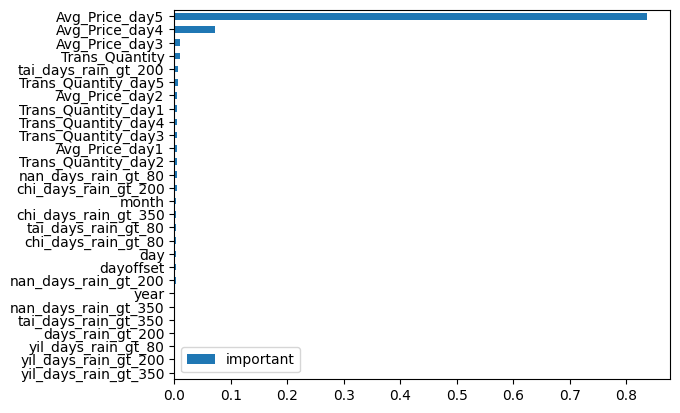

In [24]:
fi.sort_values('important').plot(kind='barh')
plt.show()

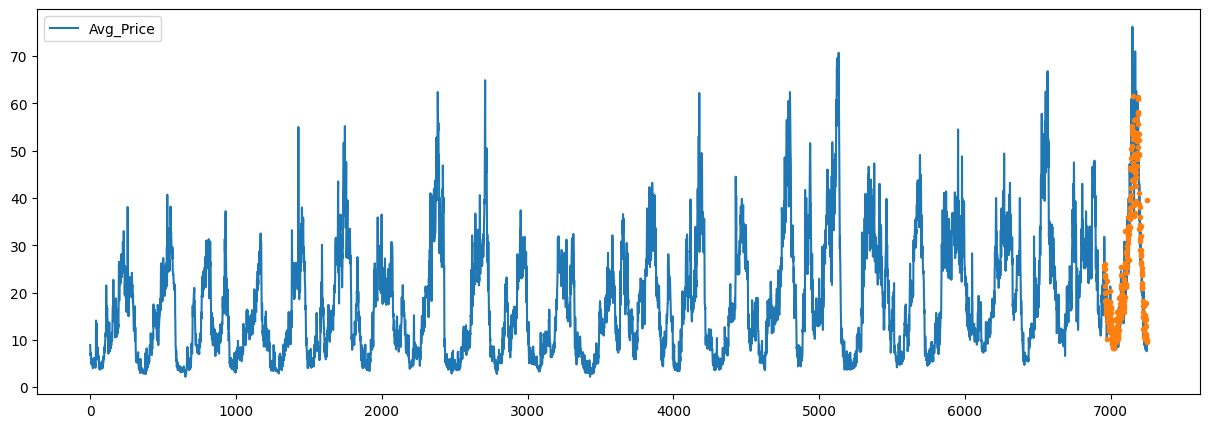

In [25]:
test = df_cabbage[(df_cabbage['datetime']>="2023-01-01")][FEATURE]
test['prediction'] = reg.predict(X_test)
df = df_cabbage.merge(test[['prediction']],how='left',left_index=True,right_index=True)

ax = df[['Avg_Price']].plot(figsize=(15,5))
df['prediction'].plot(ax=ax,style='.')
plt.show()

<AxesSubplot: >

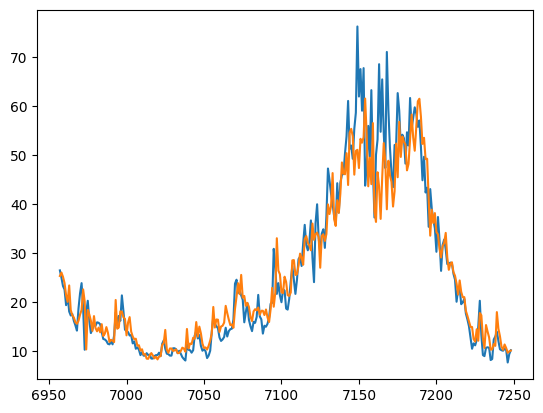

In [26]:
df_cabbage.loc[(df_cabbage['datetime'] > '2023-01-01') & (df_cabbage['datetime'] < '2023-12-31')]['Avg_Price'].plot()
df.loc[(df_cabbage['datetime'] > '2023-01-01') & (df_cabbage['datetime'] < '2023-12-31')]['prediction'].plot()

In [27]:
mean_squared_error(test['prediction'],y_test)

32.098567316630366

model 2

In [28]:
fi

,important
dayoffset,0.002793
Trans_Quantity,0.009949
year,0.001763
month,0.003748
day,0.002823
days_rain_gt_200,0.000000
chi_days_rain_gt_80,0.003311
chi_days_rain_gt_200,0.004002
chi_days_rain_gt_350,0.003612
nan_days_rain_gt_80,0.004091


In [29]:
fi["important"] > 0.005

dayoffset               False
Trans_Quantity           True
year                    False
month                   False
day                     False
days_rain_gt_200        False
chi_days_rain_gt_80     False
chi_days_rain_gt_200    False
chi_days_rain_gt_350    False
nan_days_rain_gt_80     False
nan_days_rain_gt_200    False
nan_days_rain_gt_350    False
tai_days_rain_gt_80     False
tai_days_rain_gt_200     True
tai_days_rain_gt_350    False
yil_days_rain_gt_80     False
yil_days_rain_gt_200    False
yil_days_rain_gt_350    False
Trans_Quantity_day1     False
Trans_Quantity_day2     False
Trans_Quantity_day3     False
Trans_Quantity_day4     False
Trans_Quantity_day5      True
Avg_Price_day1          False
Avg_Price_day2           True
Avg_Price_day3           True
Avg_Price_day4           True
Avg_Price_day5           True
Name: important, dtype: bool

In [30]:
FEATURE = fi[fi["important"] > 0.005].index

In [31]:
FEATURE

Index(['Trans_Quantity', 'tai_days_rain_gt_200', 'Trans_Quantity_day5',
       'Avg_Price_day2', 'Avg_Price_day3', 'Avg_Price_day4', 'Avg_Price_day5'],
      dtype='object')

In [32]:
X_train = df_cabbage[(df_cabbage['datetime']>="2010-01-01")&(df_cabbage['datetime']<="2022-01-01")][FEATURE]
y_train = df_cabbage[(df_cabbage['datetime']>="2010-01-01")&(df_cabbage['datetime']<="2022-01-01")][TARGET]

X_test = df_cabbage[(df_cabbage['datetime']>="2023-01-01")][FEATURE]
y_test = df_cabbage[(df_cabbage['datetime']>="2023-01-01")][TARGET]

print(X_train.shape)
print(X_test.shape)

(3610, 7)
(294, 7)


In [33]:
reg = xgb.XGBRegressor(n_estimators=1500 ,early_stopping_rounds=50,learning_rate=0.01)
reg.fit(X_train,y_train,
        eval_set=[(X_train,y_train),(X_test,y_test)],
        verbose=100,
        )

[0]	validation_0-rmse:12.32283	validation_1-rmse:17.53602
[100]	validation_0-rmse:5.24421	validation_1-rmse:8.29534


[200]	validation_0-rmse:2.95399	validation_1-rmse:5.76925
[300]	validation_0-rmse:2.29290	validation_1-rmse:5.26431
[400]	validation_0-rmse:2.04453	validation_1-rmse:5.18376
[500]	validation_0-rmse:1.90387	validation_1-rmse:5.13645
[600]	validation_0-rmse:1.81244	validation_1-rmse:5.11638
[632]	validation_0-rmse:1.78946	validation_1-rmse:5.12355


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1500, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

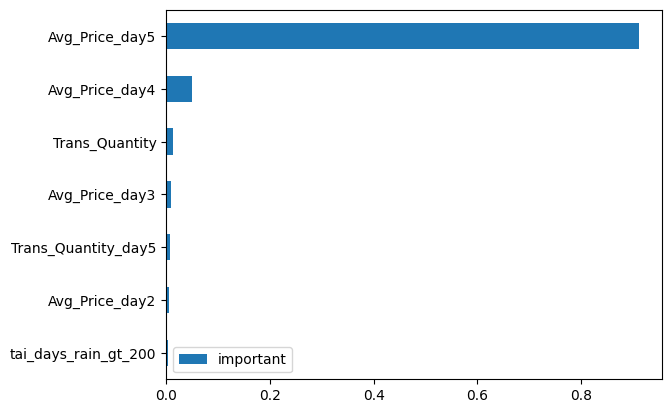

In [34]:
fi = pd.DataFrame(data=reg.feature_importances_,
             index = reg.feature_names_in_,
             columns=['important']
             )

fi.sort_values('important').plot(kind='barh')
plt.show()

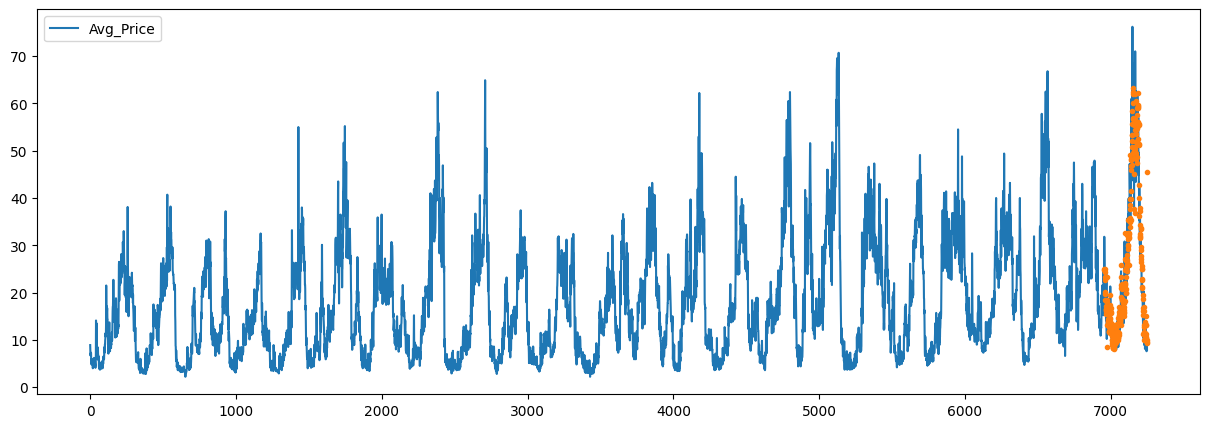

In [35]:
test = df_cabbage[(df_cabbage['datetime']>="2023-01-01")][FEATURE]
test['prediction'] = reg.predict(X_test)
df = df_cabbage.merge(test[['prediction']],how='left',left_index=True,right_index=True)

ax = df[['Avg_Price']].plot(figsize=(15,5))
df['prediction'].plot(ax=ax,style='.')
plt.show()

<AxesSubplot: >

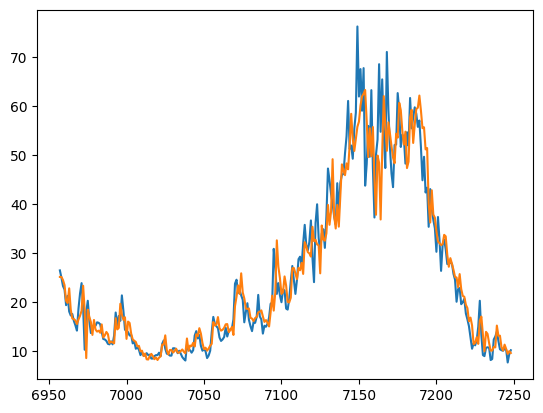

In [36]:
df_cabbage.loc[(df_cabbage['datetime'] > '2023-01-01') & (df_cabbage['datetime'] < '2023-12-31')]['Avg_Price'].plot()
df.loc[(df_cabbage['datetime'] > '2023-01-01') & (df_cabbage['datetime'] < '2023-12-31')]['prediction'].plot()

In [37]:
mean_squared_error(test['prediction'],y_test)

26.12247034302265

linear regression

In [38]:
df_cabbage.columns

Index(['dayoffset', 'TransDate', 'Crop', 'MarketName', 'Upper_Price',
       'Middle_Price', 'Lower_Price', 'Avg_Price', 'Trans_Quantity', 'year',
       'month', 'day', 'datetime', 'days_rain_gt_200', 'chi_days_rain_gt_80',
       'chi_days_rain_gt_200', 'chi_days_rain_gt_350', 'nan_days_rain_gt_80',
       'nan_days_rain_gt_200', 'nan_days_rain_gt_350', 'tai_days_rain_gt_80',
       'tai_days_rain_gt_200', 'tai_days_rain_gt_350', 'yil_days_rain_gt_80',
       'yil_days_rain_gt_200', 'yil_days_rain_gt_350', 'Trans_Quantity_day1',
       'Trans_Quantity_day2', 'Trans_Quantity_day3', 'Trans_Quantity_day4',
       'Trans_Quantity_day5', 'Avg_Price_day1', 'Avg_Price_day2',
       'Avg_Price_day3', 'Avg_Price_day4', 'Avg_Price_day5'],
      dtype='object')

In [39]:
FEATURE = ['dayoffset',  'Trans_Quantity', 'year',
       'month', 'day', 'days_rain_gt_200', 'chi_days_rain_gt_80',
       'chi_days_rain_gt_200', 'chi_days_rain_gt_350', 'nan_days_rain_gt_80',
       'nan_days_rain_gt_200', 'nan_days_rain_gt_350', 'tai_days_rain_gt_80',
       'tai_days_rain_gt_200', 'tai_days_rain_gt_350', 'yil_days_rain_gt_80',
       'yil_days_rain_gt_200', 'yil_days_rain_gt_350', 'Trans_Quantity_day1',
       'Trans_Quantity_day2', 'Trans_Quantity_day3', 'Trans_Quantity_day4',
       'Trans_Quantity_day5', 'Avg_Price_day1', 'Avg_Price_day2',
       'Avg_Price_day3', 'Avg_Price_day4', 'Avg_Price_day5','Avg_Price']

In [40]:
original = df_cabbage[FEATURE].copy()

C:\Users\user\AppData\Local\Temp\ipykernel_9044\2541684935.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_df.index, y='相關係數', data=correlation_df, palette='coolwarm')


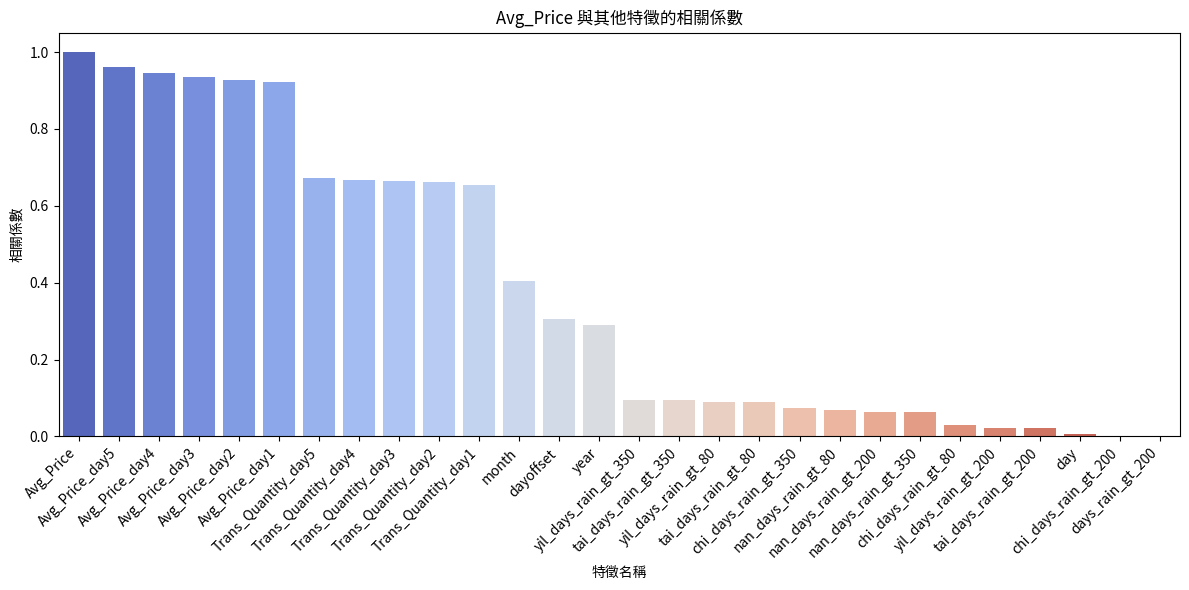

In [41]:
 # 設定中文字型
plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta']

# 獲取數值型數據列
numeric_df = original.select_dtypes(include=['float64', 'int64', 'datetime64[ns]'])

# 計算相關係數
correlations = numeric_df.corr()

# 設定要計算相關係數的目標列名稱
target_column = 'Avg_Price'

# 與目標列的相關係數
target_correlations = correlations[target_column]

# 將相關係數的絕對值存儲為 DataFrame
correlation_df = pd.DataFrame({'相關係數': target_correlations.abs()})

# 按相關係數絕對值的大小進行排序
correlation_df = correlation_df.sort_values(by='相關係數', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=correlation_df.index, y='相關係數', data=correlation_df, palette='coolwarm')
plt.title(f'{target_column} 與其他特徵的相關係數')
plt.xlabel('特徵名稱')
plt.ylabel('相關係數')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [42]:
correlations = original.corrwith(original[target_column])
select_column = correlations[abs(correlations) > 0.40].index
print(select_column)
filter_df = original[select_column].copy()

Index(['Trans_Quantity', 'month', 'Trans_Quantity_day1', 'Trans_Quantity_day2',
       'Trans_Quantity_day3', 'Trans_Quantity_day4', 'Trans_Quantity_day5',
       'Avg_Price_day1', 'Avg_Price_day2', 'Avg_Price_day3', 'Avg_Price_day4',
       'Avg_Price_day5', 'Avg_Price'],
      dtype='object')


In [43]:
df_cabbage[df_cabbage['datetime']=="2017-01-01"]

,dayoffset,TransDate,Crop,MarketName,Upper_Price,Middle_Price,Lower_Price,Avg_Price,Trans_Quantity,year,...,Trans_Quantity_day1,Trans_Quantity_day2,Trans_Quantity_day3,Trans_Quantity_day4,Trans_Quantity_day5,Avg_Price_day1,Avg_Price_day2,Avg_Price_day3,Avg_Price_day4,Avg_Price_day5
5170,6211,106/01/01,LA1 甘藍 初秋,109 台北一,7.9,5.2,3.9,5.5,247145,2017,...,176725.0,213940.0,119532.0,174326.0,267021.0,7.7,6.9,8.4,7.5,6.2


In [113]:
train = filter_df.iloc[4567:6955,:]
test = filter_df.iloc[6956:-1,:]

In [114]:
target_column = 'Avg_Price'


X = train.drop(target_column, axis=1)  
y = train[target_column]  

X_test = test.drop(target_column,axis=1)
y_test = test[target_column]

print(X.shape,y.shape,X_test.shape,y.shape)

(2388, 10) (2388,) (293, 10) (2388,)


In [115]:
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X_test)

In [116]:
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R2): {r2}')

Mean Squared Error (MSE): 21.38667330221854
Root Mean Squared Error (RMSE): 4.6245727696965195
Mean Absolute Error (MAE): 2.9291208065417584
R-squared (R2): 0.9230587886476019


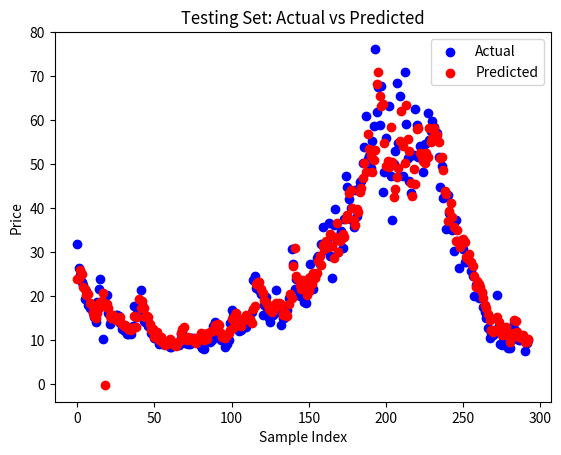

In [117]:
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted')
plt.title('Testing Set: Actual vs Predicted')
plt.xlabel('Sample Index')
plt.ylabel('Price')
plt.legend()
plt.show()

# linear regression with standlize 

In [118]:
## Feature scaling 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X_test = sc.fit_transform(X_test)

In [119]:
y_test.shape

(293,)

In [120]:
X_test.shape

(293, 10)

In [126]:
X

array([[ 0.0207023 ,  1.61647039,  1.01582511, ..., -0.80839192,
        -0.7464079 , -0.46280039],
       [ 0.23570821,  1.61647039,  0.96392267, ..., -0.75528302,
        -0.47185473, -0.37065128],
       [ 0.64975947,  0.95645766,  0.22282803, ..., -0.48215159,
        -0.380337  , -0.23242761],
       ...,
       [ 0.32066241,  0.70606546,  0.51954345, ..., -0.28488999,
        -0.51761359,  0.21295976],
       [ 0.18088848,  0.51382311,  0.71254353, ..., -0.42145571,
         0.19927524,  0.02866154],
       [ 0.47574181,  0.51382311,  0.03323041, ...,  0.18550304,
         0.0162398 ,  0.14384793]])

In [123]:
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R2): {r2}')

Mean Squared Error (MSE): 42.39324796275378
Root Mean Squared Error (RMSE): 6.511009749858602
Mean Absolute Error (MAE): 3.9624758496521184
R-squared (R2): 0.8474850293299941


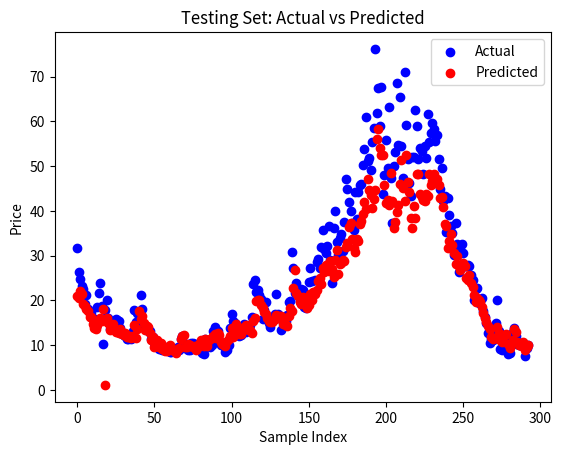

In [124]:
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted')
plt.title('Testing Set: Actual vs Predicted')
plt.xlabel('Sample Index')
plt.ylabel('Price')
plt.legend()
plt.show()

# using SelectKBest

In [64]:
from sklearn.feature_selection import SelectKBest, mutual_info_regression,f_regression

# Apply the mRMR method
selector = SelectKBest(f_regression)
selector.fit(X_train, y_train)

# Get the selected features
selected_features = X_train.columns[selector.get_support()]
selected_features

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Index(['Trans_Quantity', 'Trans_Quantity_day2', 'Trans_Quantity_day3',
       'Trans_Quantity_day4', 'Trans_Quantity_day5', 'Avg_Price_day1',
       'Avg_Price_day2', 'Avg_Price_day3', 'Avg_Price_day4', 'Avg_Price_day5'],
      dtype='object')

In [65]:
selected_features = selected_features.tolist() 

In [66]:
if "Avg_Price" not in selected_features: selected_features.append("Avg_Price")

filter_df = original[selected_features].copy()

train = filter_df.iloc[4567:6955,:]
test = filter_df.iloc[6956:-1,:]

In [67]:
target_column = 'Avg_Price'

X = train.drop(target_column, axis=1)  
y = train[target_column]  

X_test = test.drop(target_column,axis=1)
y_test = test[target_column]

In [68]:
X.shape

(2388, 10)

In [69]:
X_test.shape

(293, 10)

In [70]:
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R2): {r2}')

Mean Squared Error (MSE): 21.38667330221854
Root Mean Squared Error (RMSE): 4.6245727696965195
Mean Absolute Error (MAE): 2.9291208065417584
R-squared (R2): 0.9230587886476019


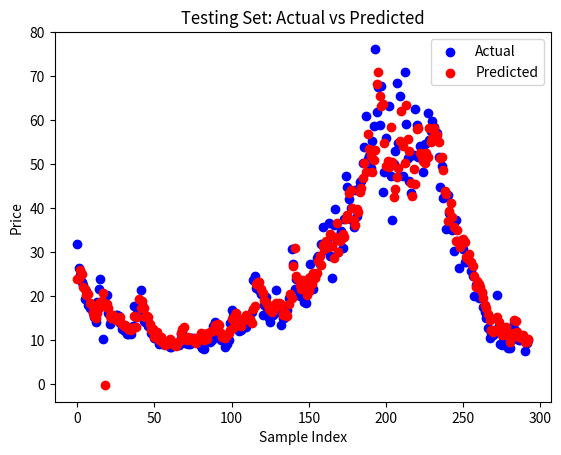

In [71]:
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted')
plt.title('Testing Set: Actual vs Predicted')
plt.xlabel('Sample Index')
plt.ylabel('Price')
plt.legend()
plt.show()

# Random Forest 

In [99]:
FEATURE = ['dayoffset',  'Trans_Quantity', 'year',
       'month', 'day', 'days_rain_gt_200', 'chi_days_rain_gt_80',
       'chi_days_rain_gt_200', 'chi_days_rain_gt_350', 'nan_days_rain_gt_80',
       'nan_days_rain_gt_200', 'nan_days_rain_gt_350', 'tai_days_rain_gt_80',
       'tai_days_rain_gt_200', 'tai_days_rain_gt_350', 'yil_days_rain_gt_80',
       'yil_days_rain_gt_200', 'yil_days_rain_gt_350', 'Trans_Quantity_day1',
       'Trans_Quantity_day2', 'Trans_Quantity_day3', 'Trans_Quantity_day4',
       'Trans_Quantity_day5', 'Avg_Price_day1', 'Avg_Price_day2',
       'Avg_Price_day3', 'Avg_Price_day4', 'Avg_Price_day5']
TARGET = ['Avg_Price']

In [100]:
X_train = df_cabbage[(df_cabbage['datetime']>="2010-01-01")&(df_cabbage['datetime']<="2022-01-01")][FEATURE]
y_train = df_cabbage[(df_cabbage['datetime']>="2010-01-01")&(df_cabbage['datetime']<="2022-01-01")][TARGET]

X_test = df_cabbage[(df_cabbage['datetime']>="2023-01-01")][FEATURE]
y_test = df_cabbage[(df_cabbage['datetime']>="2023-01-01")][TARGET]

print(X_train.shape)
print(X_test.shape)

(3610, 28)
(294, 28)


In [84]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel

# Assume X_train, y_train are your data
clf = RandomForestRegressor(n_estimators=1000, random_state=0, n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(n_estimators=1000, n_jobs=-1, random_state=0)

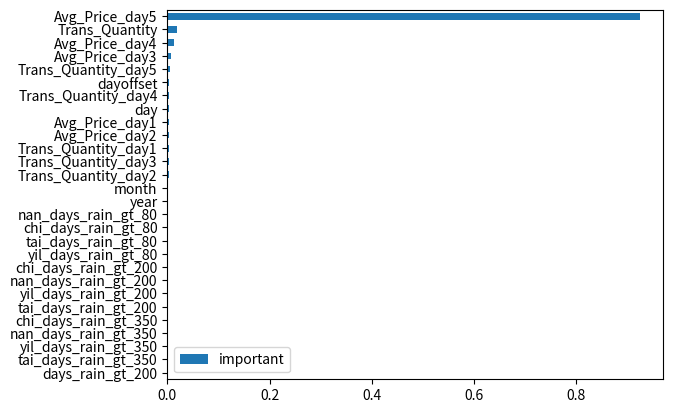

In [85]:
fi = pd.DataFrame(data=clf.feature_importances_,
             index = clf.feature_names_in_,
             columns=['important']
             )

fi.sort_values('important').plot(kind='barh')
plt.show()

In [86]:
fi

,important
dayoffset,0.003853
Trans_Quantity,0.019167
year,0.000928
month,0.001719
day,0.003595
days_rain_gt_200,0.000000
chi_days_rain_gt_80,0.000445
chi_days_rain_gt_200,0.000192
chi_days_rain_gt_350,0.000035
nan_days_rain_gt_80,0.000773
